### Importing Libraries

In [374]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode
import pandas as pd
import seaborn as sns

### Data Visualization

In [377]:
iris_data = pd.read_csv("Iris.csv")
X = iris_data.iloc[:, [1, 2, 3]].values

In [378]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa


In [379]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [380]:
pd.set_option('display.float', '{:.2f}'.format)
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00,150.00
mean,75.50,5.84,3.05,3.76,1.20
std,43.45,0.83,0.43,1.76,0.76
min,1.00,4.30,2.00,1.00,0.10
25%,38.25,5.10,2.80,1.60,0.30
50%,75.50,5.80,3.00,4.35,1.30
75%,112.75,6.40,3.30,5.10,1.80
max,150.00,7.90,4.40,6.90,2.50


In [381]:
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.10,3.50,1.40,0.20,Iris-setosa
1,2,4.90,3.00,1.40,0.20,Iris-setosa
2,3,4.70,3.20,1.30,0.20,Iris-setosa
3,4,4.60,3.10,1.50,0.20,Iris-setosa
4,5,5.00,3.60,1.40,0.20,Iris-setosa


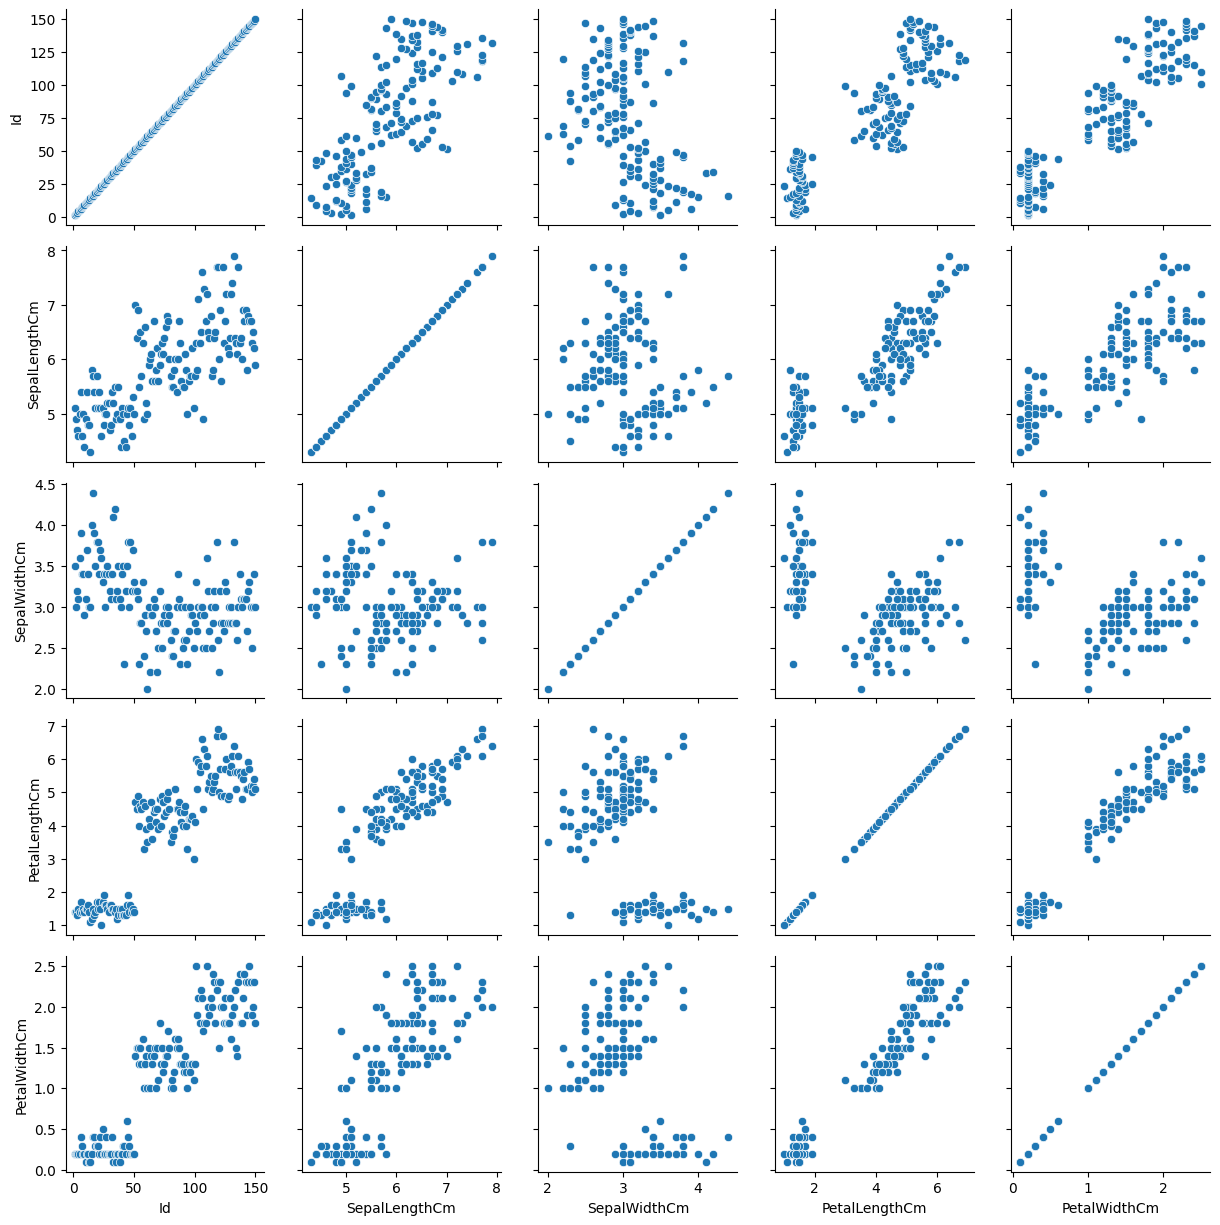

In [382]:
g = sns.PairGrid(iris_data)
g.map(sns.scatterplot)

<Axes: xlabel='PetalLengthCm', ylabel='Species'>

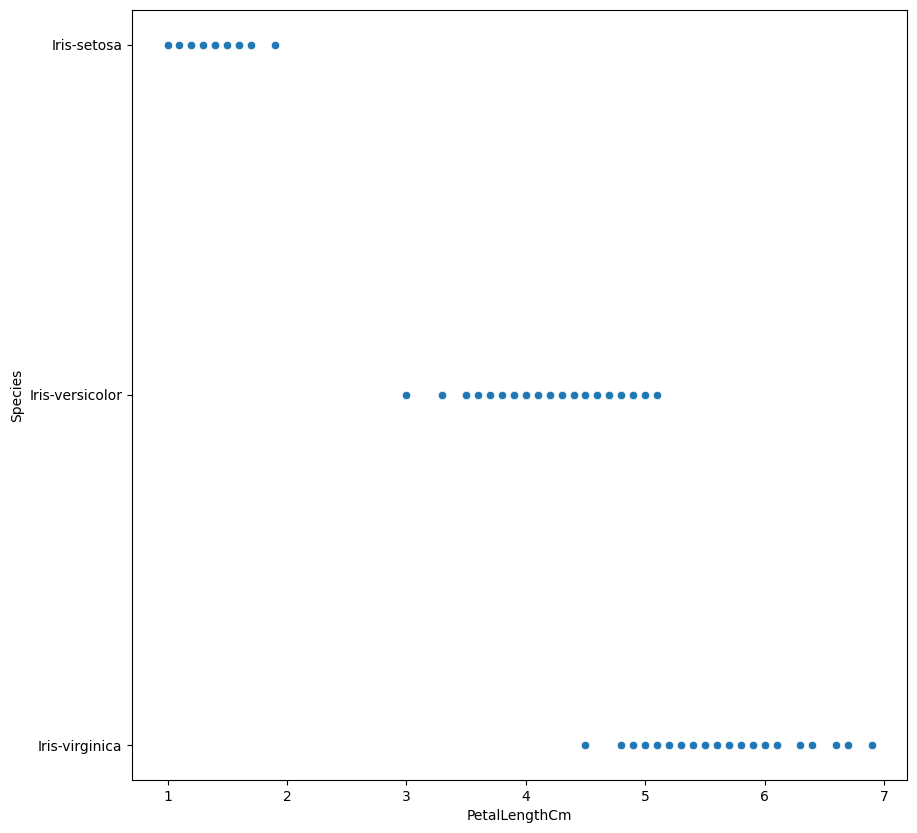

In [383]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='PetalLengthCm', y='Species', data=iris_data)

### Model Training

#### K-Means Original Algorithm

In [384]:
# Initialize and fit the K-Means model
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')
kmeans.fit(X)

# Get cluster assignments for each data point
cluster_assignments = kmeans.labels_

In [385]:
cluster_assignments

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [386]:
# Map the true species labels to numeric values
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
true_labels = iris_data['Species'].map(label_mapping).values

print(accuracy_score(true_labels, cluster_assignments))

0.88


#### K-Means with Improved Initial Centroids

In [387]:
X

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [388]:
import math

# custom input data
dataset = {}

i = 1
for d_point in X:
    key = i
    key_name = 'd{key}'.format(key=key)
    dataset[key_name] = tuple(d_point[1:])
    i = i + 1
    
print(dataset)

{'d1': (3.5, 1.4), 'd2': (3.0, 1.4), 'd3': (3.2, 1.3), 'd4': (3.1, 1.5), 'd5': (3.6, 1.4), 'd6': (3.9, 1.7), 'd7': (3.4, 1.4), 'd8': (3.4, 1.5), 'd9': (2.9, 1.4), 'd10': (3.1, 1.5), 'd11': (3.7, 1.5), 'd12': (3.4, 1.6), 'd13': (3.0, 1.4), 'd14': (3.0, 1.1), 'd15': (4.0, 1.2), 'd16': (4.4, 1.5), 'd17': (3.9, 1.3), 'd18': (3.5, 1.4), 'd19': (3.8, 1.7), 'd20': (3.8, 1.5), 'd21': (3.4, 1.7), 'd22': (3.7, 1.5), 'd23': (3.6, 1.0), 'd24': (3.3, 1.7), 'd25': (3.4, 1.9), 'd26': (3.0, 1.6), 'd27': (3.4, 1.6), 'd28': (3.5, 1.5), 'd29': (3.4, 1.4), 'd30': (3.2, 1.6), 'd31': (3.1, 1.6), 'd32': (3.4, 1.5), 'd33': (4.1, 1.5), 'd34': (4.2, 1.4), 'd35': (3.1, 1.5), 'd36': (3.2, 1.2), 'd37': (3.5, 1.3), 'd38': (3.1, 1.5), 'd39': (3.0, 1.3), 'd40': (3.4, 1.5), 'd41': (3.5, 1.3), 'd42': (2.3, 1.3), 'd43': (3.2, 1.3), 'd44': (3.5, 1.6), 'd45': (3.8, 1.9), 'd46': (3.0, 1.4), 'd47': (3.8, 1.6), 'd48': (3.2, 1.4), 'd49': (3.7, 1.5), 'd50': (3.3, 1.4), 'd51': (3.2, 4.7), 'd52': (3.2, 4.5), 'd53': (3.1, 4.9), '

##### Steps 1, 2, 3

In [389]:
k = 3

adjusted_dataset = dataset

def adjust_dataset_for_negatives_global(dataset):
    """
    Adjust the dataset by finding the global minimum value across all attributes and subtracting it
    from each attribute of the data points.
    """
    # Find the global minimum value across all attributes
    global_min = min(attribute for point in dataset.values() for attribute in point)

    # Adjust the dataset by subtracting the global minimum value
    adjusted_dataset = {key: tuple(attribute - global_min for attribute in point) 
                        for key, point in dataset.items()}

    return adjusted_dataset

# Adjust the dataset if it contains negative values
for (value_1, value_2, value_3) in X:
    if value_1 < 0 or value_2 < 0 or value_3 < 0:
        adjusted_dataset = adjust_dataset_for_negatives_global(dataset)
        
print("STEP 1, 2, 3: Adjusted dataset", adjusted_dataset)
print("================================================")

STEP 1, 2, 3: Adjusted dataset {'d1': (3.5, 1.4), 'd2': (3.0, 1.4), 'd3': (3.2, 1.3), 'd4': (3.1, 1.5), 'd5': (3.6, 1.4), 'd6': (3.9, 1.7), 'd7': (3.4, 1.4), 'd8': (3.4, 1.5), 'd9': (2.9, 1.4), 'd10': (3.1, 1.5), 'd11': (3.7, 1.5), 'd12': (3.4, 1.6), 'd13': (3.0, 1.4), 'd14': (3.0, 1.1), 'd15': (4.0, 1.2), 'd16': (4.4, 1.5), 'd17': (3.9, 1.3), 'd18': (3.5, 1.4), 'd19': (3.8, 1.7), 'd20': (3.8, 1.5), 'd21': (3.4, 1.7), 'd22': (3.7, 1.5), 'd23': (3.6, 1.0), 'd24': (3.3, 1.7), 'd25': (3.4, 1.9), 'd26': (3.0, 1.6), 'd27': (3.4, 1.6), 'd28': (3.5, 1.5), 'd29': (3.4, 1.4), 'd30': (3.2, 1.6), 'd31': (3.1, 1.6), 'd32': (3.4, 1.5), 'd33': (4.1, 1.5), 'd34': (4.2, 1.4), 'd35': (3.1, 1.5), 'd36': (3.2, 1.2), 'd37': (3.5, 1.3), 'd38': (3.1, 1.5), 'd39': (3.0, 1.3), 'd40': (3.4, 1.5), 'd41': (3.5, 1.3), 'd42': (2.3, 1.3), 'd43': (3.2, 1.3), 'd44': (3.5, 1.6), 'd45': (3.8, 1.9), 'd46': (3.0, 1.4), 'd47': (3.8, 1.6), 'd48': (3.2, 1.4), 'd49': (3.7, 1.5), 'd50': (3.3, 1.4), 'd51': (3.2, 4.7), 'd52': (

##### Step 4

In [390]:
def calculate_from_origin(dataset):
    """
    After formatting the data, this function is needed to find
    Euclidian distance between the origin and data points.
    """
    distances = {}
    for point in dataset.values():
        operand = 0
        for attribute in point:
            operand += attribute * attribute
        distances[point] = math.sqrt(operand)
        
    return distances

distances_from_origin = calculate_from_origin(adjusted_dataset)
print("STEP 4: Calculate Distances from Origin:", distances_from_origin)
print("================================================")

STEP 4: Calculate Distances from Origin: {(3.5, 1.4): 3.7696153649941526, (3.0, 1.4): 3.3105890714493698, (3.2, 1.3): 3.453983207834109, (3.1, 1.5): 3.443835071544513, (3.6, 1.4): 3.862641583165593, (3.9, 1.7): 4.254409477236529, (3.4, 1.4): 3.676955262170047, (3.4, 1.5): 3.716180835212409, (2.9, 1.4): 3.2202484376209237, (3.7, 1.5): 3.992492955535426, (3.4, 1.6): 3.757658845611187, (3.0, 1.1): 3.1953090617340916, (4.0, 1.2): 4.17612260356422, (4.4, 1.5): 4.648655719667784, (3.9, 1.3): 4.110960958218893, (3.8, 1.7): 4.162931659299729, (3.8, 1.5): 4.085339643163099, (3.4, 1.7): 3.8013155617496426, (3.6, 1.0): 3.736308338453881, (3.3, 1.7): 3.712142238654117, (3.4, 1.9): 3.894868418830089, (3.0, 1.6): 3.4, (3.5, 1.5): 3.8078865529319543, (3.2, 1.6): 3.577708763999664, (3.1, 1.6): 3.488552708502482, (4.1, 1.5): 4.365775990588615, (4.2, 1.4): 4.427188724235731, (3.2, 1.2): 3.417601498127013, (3.5, 1.3): 3.7336309405188937, (3.0, 1.3): 3.269556544854363, (2.3, 1.3): 2.6419689627245813, (3.5

##### Step 5

In [391]:
# Implement heap sort to sort the distances along with their corresponding data point keys
def heap_sort(distances):
    arr = list(distances.items())

    def heapify(n, i):
        largest = i
        left = 2 * i + 1
        right = 2 * i + 2

        if left < n and arr[left][1] > arr[largest][1]:
            largest = left
        if right < n and arr[right][1] > arr[largest][1]:
            largest = right
        if largest != i:
            arr[i], arr[largest] = arr[largest], arr[i]
            heapify(n, largest)

    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(i, 0)

    return [key for key, _ in arr]

sorted_keys = heap_sort(distances_from_origin)
print("STEP 5: Sorted Points: ", sorted_keys)
print("================================================")

STEP 5: Sorted Points:  [(2.3, 1.3), (3.0, 1.1), (2.9, 1.4), (3.0, 1.3), (3.0, 1.4), (3.0, 1.6), (3.2, 1.2), (3.1, 1.5), (3.2, 1.3), (3.1, 1.6), (3.2, 1.4), (3.2, 1.6), (3.3, 1.4), (3.4, 1.4), (3.3, 1.7), (3.4, 1.5), (3.5, 1.3), (3.6, 1.0), (3.4, 1.6), (3.5, 1.4), (3.4, 1.7), (3.5, 1.5), (3.5, 1.6), (3.6, 1.4), (3.4, 1.9), (2.5, 3.0), (3.7, 1.5), (2.3, 3.3), (2.0, 3.5), (2.4, 3.3), (3.8, 1.5), (3.9, 1.3), (3.8, 1.6), (3.8, 1.7), (4.0, 1.2), (3.8, 1.9), (3.9, 1.7), (2.6, 3.5), (4.1, 1.5), (2.4, 3.7), (4.2, 1.4), (2.4, 3.8), (2.2, 4.0), (2.3, 4.0), (2.9, 3.6), (2.5, 3.9), (4.4, 1.5), (2.5, 4.0), (2.7, 3.9), (2.6, 4.0), (2.8, 4.0), (2.7, 4.1), (2.8, 4.1), (2.3, 4.4), (2.7, 4.2), (2.2, 4.5), (3.0, 4.1), (2.9, 4.2), (2.6, 4.4), (2.5, 4.5), (3.0, 4.2), (2.9, 4.3), (2.8, 4.5), (3.0, 4.4), (2.9, 4.5), (3.1, 4.4), (2.8, 4.6), (3.0, 4.5), (2.9, 4.6), (2.2, 5.0), (2.8, 4.7), (3.0, 4.6), (2.5, 4.9), (3.2, 4.5), (2.9, 4.7), (2.8, 4.8), (2.5, 5.0), (2.7, 4.9), (3.1, 4.7), (3.4, 4.5), (2.8, 4.9), (3.

##### Step 6

In [392]:
def partition_into_k_sets(sorted_points, k):
    """
    Partition the sorted points into k equal (or as equal as possible) sets.
    """
    
    n = len(sorted_points)
    partition_size = n // k
    remainder = n % k
    partitions = []
    start_idx = 0

    for i in range(k):
        # Determine the end index for the current partition
        end_idx = start_idx + partition_size + (1 if i < remainder else 0)
        # Create the partition and add it to the partitions list
        partitions.append(sorted_points[start_idx:end_idx])
        # Update the start index for the next partition
        start_idx = end_idx

    return partitions

k = 3 # Number of desired clusters
partitions = partition_into_k_sets(sorted_keys, k)
print("STEP 6: For Given k = 3, Clusters: ", partitions)
print("================================================")

STEP 6: For Given k = 3, Clusters:  [[(2.3, 1.3), (3.0, 1.1), (2.9, 1.4), (3.0, 1.3), (3.0, 1.4), (3.0, 1.6), (3.2, 1.2), (3.1, 1.5), (3.2, 1.3), (3.1, 1.6), (3.2, 1.4), (3.2, 1.6), (3.3, 1.4), (3.4, 1.4), (3.3, 1.7), (3.4, 1.5), (3.5, 1.3), (3.6, 1.0), (3.4, 1.6), (3.5, 1.4), (3.4, 1.7), (3.5, 1.5), (3.5, 1.6), (3.6, 1.4), (3.4, 1.9), (2.5, 3.0), (3.7, 1.5), (2.3, 3.3), (2.0, 3.5), (2.4, 3.3), (3.8, 1.5), (3.9, 1.3), (3.8, 1.6), (3.8, 1.7), (4.0, 1.2), (3.8, 1.9), (3.9, 1.7), (2.6, 3.5), (4.1, 1.5), (2.4, 3.7), (4.2, 1.4)], [(2.4, 3.8), (2.2, 4.0), (2.3, 4.0), (2.9, 3.6), (2.5, 3.9), (4.4, 1.5), (2.5, 4.0), (2.7, 3.9), (2.6, 4.0), (2.8, 4.0), (2.7, 4.1), (2.8, 4.1), (2.3, 4.4), (2.7, 4.2), (2.2, 4.5), (3.0, 4.1), (2.9, 4.2), (2.6, 4.4), (2.5, 4.5), (3.0, 4.2), (2.9, 4.3), (2.8, 4.5), (3.0, 4.4), (2.9, 4.5), (3.1, 4.4), (2.8, 4.6), (3.0, 4.5), (2.9, 4.6), (2.2, 5.0), (2.8, 4.7), (3.0, 4.6), (2.5, 4.9), (3.2, 4.5), (2.9, 4.7), (2.8, 4.8), (2.5, 5.0), (2.7, 4.9), (3.1, 4.7), (3.4, 4.5), 

##### Step 7

In [393]:
initial_centroids = []
for partition in partitions:
    initial_centroids.append(partition[len(partition) // 2])

print("STEP 7: Initial Centroids", initial_centroids)
print("================================================")

STEP 7: Initial Centroids [(3.4, 1.7), (2.9, 4.3), (2.5, 5.8)]


##### Step 8

In [394]:
def calculate_distances_to_centroids(dataset, centroids):
    """
    Calculate the Euclidean distance from each data point in the dataset to each of the centroids.
    """
    distances = {}

    for key, point in dataset.items():
        point_distances = []
        for centroid in centroids:
            distance = math.sqrt(sum((attr - cent) ** 2 for attr, cent in zip(point, centroid)))
            point_distances.append(distance)
        distances[key] = point_distances

    return distances

distances_to_centroids = calculate_distances_to_centroids(adjusted_dataset, initial_centroids)
print("STEP 8: Distance between Each Data Point to All the Initial Centroids:", distances_to_centroids)
print("================================================")

STEP 8: Distance between Each Data Point to All the Initial Centroids: {'d1': [0.316227766016838, 2.9614185789921694, 4.512205669071391], 'd2': [0.49999999999999994, 2.9017236257093817, 4.428317965096906], 'd3': [0.44721359549995776, 3.014962686336267, 4.5541190146942805], 'd4': [0.3605551275463988, 2.80713376952364, 4.341658669218481], 'd5': [0.36055512754639907, 2.9832867780352594, 4.535416188179427], 'd6': [0.5, 2.7856776554368237, 4.332435804486894], 'd7': [0.30000000000000004, 2.9427877939124323, 4.491102314577124], 'd8': [0.19999999999999996, 2.8442925306655784, 4.393176527297759], 'd9': [0.5830951894845301, 2.9, 4.418144406874904], 'd10': [0.3605551275463988, 2.80713376952364, 4.341658669218481], 'd11': [0.3605551275463991, 2.912043955712207, 4.464302857109943], 'd12': [0.09999999999999987, 2.745906043549196, 4.295346318982905], 'd13': [0.49999999999999994, 2.9017236257093817, 4.428317965096906], 'd14': [0.7211102550927977, 3.2015621187164243, 4.726520919238588], 'd15': [0.78102

##### # STEP 9, 10, 11, 12

In [395]:
NearestDist = []
ClusterId = []
i = 0
for distances in distances_to_centroids.values():
    NearestDist.insert(i, min(distances))
    ClusterId.insert(i, distances.index(min(distances)))
    i = i + 1

print("STEPS 10, 11, 12")
print("Nearest Distances:", NearestDist)
print("Cluster IDs:", ClusterId)

STEPS 10, 11, 12
Nearest Distances: [0.316227766016838, 0.49999999999999994, 0.44721359549995776, 0.3605551275463988, 0.36055512754639907, 0.5, 0.30000000000000004, 0.19999999999999996, 0.5830951894845301, 0.3605551275463988, 0.3605551275463991, 0.09999999999999987, 0.49999999999999994, 0.7211102550927977, 0.7810249675906655, 1.0198039027185575, 0.6403124237432848, 0.316227766016838, 0.3999999999999999, 0.4472135954999578, 0.0, 0.3605551275463991, 0.7280109889280518, 0.10000000000000009, 0.19999999999999996, 0.41231056256176596, 0.09999999999999987, 0.22360679774997896, 0.30000000000000004, 0.2236067977499787, 0.3162277660168377, 0.19999999999999996, 0.7280109889280515, 0.8544003745317533, 0.3605551275463988, 0.5385164807134504, 0.41231056256176596, 0.3605551275463988, 0.5656854249492379, 0.19999999999999996, 0.41231056256176596, 1.1704699910719625, 0.44721359549995776, 0.14142135623730948, 0.4472135954999578, 0.49999999999999994, 0.41231056256176596, 0.36055512754639885, 0.36055512754

##### Step 13, 14 

In [396]:
def recalculate_centroids(cluster_id, dataset, k):
    # Initialize new_clusters with empty lists for each cluster
    new_clusters = [[] for _ in range(k)]

    # Populate new_clusters with data points based on their cluster ID
    for key, cluster_idx in zip(dataset.keys(), cluster_id):
        new_clusters[cluster_idx].append(dataset[key])

    # Calculate new centroids for each cluster
    new_centroids = []
    for cluster in new_clusters:
        centroid = tuple(sum(coord) / len(cluster) for coord in zip(*cluster)) if cluster else None
        new_centroids.append(centroid)

    return new_clusters, new_centroids

while True:
    new_clusters, new_centroids = recalculate_centroids(ClusterId, dataset, k)

    # Temporary lists to store updated cluster IDs and nearest distances
    updated_cluster_id = []
    updated_nearest_dist = []

    # Loop over each data point
    for key, point in dataset.items():
        # STEP 14.1
        current_nearest_centroid = new_centroids[ClusterId[list(dataset.keys()).index(key)]]
        current_distance = math.sqrt(sum((attr - cent) ** 2 for attr, cent in zip(point, current_nearest_centroid)))

        # STEP 14.2
        if current_distance <= NearestDist[list(dataset.keys()).index(key)]:
            # Keep the current cluster assignment
            updated_cluster_id.append(ClusterId[list(dataset.keys()).index(key)])
            updated_nearest_dist.append(current_distance)
        else:
            # STEP 14.2.1
            distances = [math.sqrt(sum((attr - cent) ** 2 for attr, cent in zip(point, centroid))) for centroid in new_centroids]
            closest_centroid_idx = distances.index(min(distances))
            updated_cluster_id.append(closest_centroid_idx)
            updated_nearest_dist.append(min(distances))

    # Check for convergence
    if updated_cluster_id == ClusterId:
        print("Convergence reached.")
        break
    else:
        # Update ClusterId and NearestDist for the next iteration
        ClusterId = updated_cluster_id
        NearestDist = updated_nearest_dist
        print("Further iterations required. Continuing...")

Further iterations required. Continuing...
Convergence reached.


In [397]:
print(new_clusters)

[[(3.5, 1.4), (3.0, 1.4), (3.2, 1.3), (3.1, 1.5), (3.6, 1.4), (3.9, 1.7), (3.4, 1.4), (3.4, 1.5), (2.9, 1.4), (3.1, 1.5), (3.7, 1.5), (3.4, 1.6), (3.0, 1.4), (3.0, 1.1), (4.0, 1.2), (4.4, 1.5), (3.9, 1.3), (3.5, 1.4), (3.8, 1.7), (3.8, 1.5), (3.4, 1.7), (3.7, 1.5), (3.6, 1.0), (3.3, 1.7), (3.4, 1.9), (3.0, 1.6), (3.4, 1.6), (3.5, 1.5), (3.4, 1.4), (3.2, 1.6), (3.1, 1.6), (3.4, 1.5), (4.1, 1.5), (4.2, 1.4), (3.1, 1.5), (3.2, 1.2), (3.5, 1.3), (3.1, 1.5), (3.0, 1.3), (3.4, 1.5), (3.5, 1.3), (2.3, 1.3), (3.2, 1.3), (3.5, 1.6), (3.8, 1.9), (3.0, 1.4), (3.8, 1.6), (3.2, 1.4), (3.7, 1.5), (3.3, 1.4)], [(3.2, 4.7), (3.2, 4.5), (3.1, 4.9), (2.3, 4.0), (2.8, 4.6), (2.8, 4.5), (3.3, 4.7), (2.4, 3.3), (2.9, 4.6), (2.7, 3.9), (2.0, 3.5), (3.0, 4.2), (2.2, 4.0), (2.9, 4.7), (2.9, 3.6), (3.1, 4.4), (3.0, 4.5), (2.7, 4.1), (2.2, 4.5), (2.5, 3.9), (3.2, 4.8), (2.8, 4.0), (2.5, 4.9), (2.8, 4.7), (2.9, 4.3), (3.0, 4.4), (2.8, 4.8), (3.0, 5.0), (2.9, 4.5), (2.6, 3.5), (2.4, 3.8), (2.4, 3.7), (2.7, 3.9), 

In [398]:
print(new_centroids)

[(3.4180000000000006, 1.464), (2.7650000000000006, 4.365), (3.0324999999999998, 5.717499999999999)]


In [399]:
print(ClusterId)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1]


In [400]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Map the true species labels to numeric values
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
true_labels = iris_data['Species'].map(label_mapping).values

print(accuracy_score(true_labels, ClusterId))

0.92
